In [106]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [107]:
df = pd.read_csv('https://raw.githubusercontent.com/abdullabasim/hello-world/master/framingham.csv')

In [108]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [110]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [111]:
df['education'].unique()

array([ 4.,  2.,  1.,  3., nan])

In [112]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


df1 = pd.DataFrame(sc.fit_transform(df), columns = df.columns)
df1.head()




,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.153192,-1.234951,1.982068,-0.988271,-0.755376,-0.174741,-0.077033,-0.671101,-0.162477,-0.935776,-1.195907,-1.082625,0.286299,0.342704,-0.207320,-0.423305
1,-0.867158,-0.418257,0.020644,-0.988271,-0.755376,-0.174741,-0.077033,-0.671101,-0.162477,0.297822,-0.515187,-0.158988,0.717711,1.590087,-0.249062,-0.423305
2,1.153192,-0.184916,-0.960068,1.011868,0.922662,-0.174741,-0.077033,-0.671101,-0.162477,0.185677,-0.220209,-0.242955,-0.113247,-0.073090,-0.499512,-0.423305
3,-0.867158,1.331800,1.001356,1.011868,1.761681,-0.174741,-0.077033,1.490089,-0.162477,-0.262904,0.800871,1.016549,0.680943,-0.904679,0.877962,2.362360
4,-0.867158,-0.418257,1.001356,1.011868,1.174368,-0.174741,-0.077033,-0.671101,-0.162477,1.082840,-0.106755,0.092912,-0.662317,0.758498,0.126613,-0.423305


In [113]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [114]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

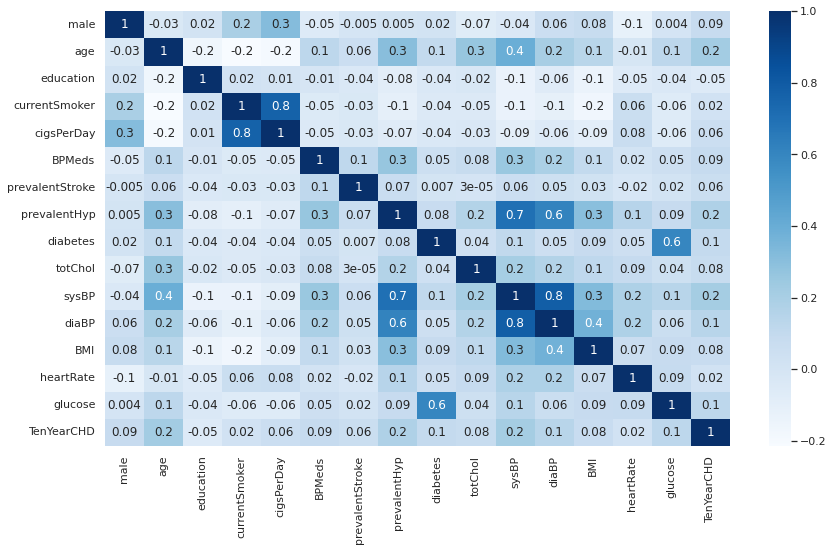

In [115]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [116]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.979188,0.494101,9.003775,0.029731,0.005899,0.310524,0.025720,236.741671,132.352407,82.893464,25.802527,75.879991,81.888485,0.151958
std,0.495022,8.572160,1.010098,0.500024,11.885884,0.168861,0.076587,0.462763,0.158316,44.367154,22.038097,11.910850,4.072766,12.025378,22.999223,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,86.150000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Text(0, 0.5, 'age')

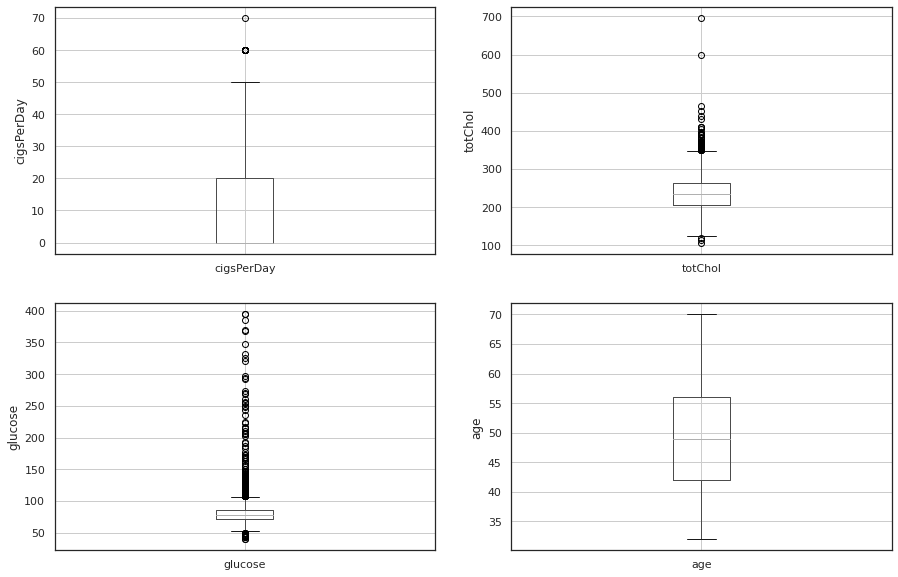

In [117]:


plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='cigsPerDay')
fig.set_title('')
fig.set_ylabel('cigsPerDay')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='totChol')
fig.set_title('')
fig.set_ylabel('totChol')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='glucose')
fig.set_title('')
fig.set_ylabel('glucose')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='age')
fig.set_title('')
fig.set_ylabel('age')

In [118]:
def outlier(df,feature):
    Q1=df[feature].quantile(0.25)
    Q3=df[feature].quantile(0.75)
    IQR=Q3-Q1
    lower_band = Q1 - 1.5 * IQR
    upper_band = Q3 + 1.5 * IQR

    print("lower is : ",lower_band)

    return df.index[(df[feature] < lower_band) | (df[feature] > upper_band)]

In [119]:
cigsPerDay_list = outlier(df , 'cigsPerDay')

df.cigsPerDay = np.where(  (df.index.isin(cigsPerDay_list)), df.cigsPerDay.mean().astype(int), df.cigsPerDay )



lower is :  -30.0


In [120]:
totChol_list = outlier(df , 'totChol')

df.totChol = np.where(  (df.index.isin(totChol_list)), df.totChol.mean().astype(int), df.totChol )


lower is :  120.5


In [121]:
glucose_list = outlier(df , 'glucose')

df.glucose = np.where(  (df.index.isin(glucose_list)), df.glucose.mean().astype(int), df.glucose )



lower is :  50.77499999999999


In [122]:
df['TenYearCHD'].value_counts()

0.0    3594
1.0     644
Name: TenYearCHD, dtype: int64

In [123]:
X = df.drop(['TenYearCHD'], axis=1)
y = df['TenYearCHD']

In [124]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [ ]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

classifier = SVC( random_state = 0)

parameters = [
	{"kernel":
		["linear"],
		"C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]},
	{"kernel":
		["poly"],
		"degree": [2, 3, 4],
		"C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]},
	{"kernel":
		["rbf"],
		"gamma": ["auto", "scale"],
		"C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]}
]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X,y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

In [ ]:
# Training the Kernel SVM model on the Training set

classifier = SVC(random_state = 11)
classifier.fit(X, y)

In [ ]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X, y = y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))